<a href="https://colab.research.google.com/github/Dain777666/ESAA_25-2/blob/main/OB_WEEK6_FRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CH.9 추천 시스템

### 01. 추천 시스템의 개요와 배경

- 추천 시스템은 크게 **콘텐츠 기반 필터링**과 **협업 필터링**으로 나뉨

- 협업 필터링 방식은 다시 최근접 이웃(Nearest Neighbor) 협업 필터링과 잠재 요인(Latent Factor) 협업 필터링으로 나뉨

- 넷플릭스 추천 시스템 경연 대회에서 행렬 분해(Matrix Factorization) 기법을 이용한 잠재 요인 협업 필터링 방식이 우승하면서 유행이 바뀜

- 요즘에는 개인화 특성을 좀 더 강화하기 위해서 하이브리드 형식으로 콘텐츠 기반과 협업 기반을 적절히 결합해 사용하는 경우도 있음



### 02. 콘텐츠 기반 필터링 추천 시스템

- 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

- 예) 사용자가 특정 영화에 높은 평점을 줬다면 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등의 콘텐츠와 유사한 다른 영화를 추천해줌

### 03. 최근접 이웃 협업 필터링(메모리 협업 필터링)

- 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 방식

- 주요 목표: 사용자一아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating)하는 것

- 최근접 이웃 협업 필터링은 일반적으로 사용자 기반과 아이템 기반으로 다시 나뉨

  - 사용자 기반: 당신과 비슷한 고객들이 다음 상품도 구매했습니다.

  - 아이템 기반: 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다.

- 협업 필터링 기반의 두 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천을 수행함

  -  행(Row)은 개별 사용자, 열(Column)은 개별 아이템으로 구성

  - 일반적으로 이러한 사용자-아이템 평점 행렬은 많은 아이템을 일로 가지는 다차원 행렬이며, 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때문에 희소 행렬(Sparse Matrix) 특성을 가지고 있음

< 사용자 기반 >

- 특정 사용자와 유사한 다른 사용자를 Top-N으로 선정해 이 Top-N 사용자가 좋아하는 아이템을 추천하는 방식

- 특정 사용자와 타 사용자 간의 유사도(Similarity)를 측정한 뒤 가장 유사도가 높은 Top-N 사용자를 추출해야 함 -> 코사인 유사도 많이 이용

< 아이템 기반 >

- 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 되는 알고리즘

- 사용자 기반 최근접 이웃 데이터 세트와 행과 열이 서로 반대임

- 일반적으로 사용자 기반보다는 아이템 기반 협업 필터링이 정확도가 더 높음


### 04. 잠재 요인 협업 필터링

- 잠재 요인 협업 필터링은 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법

- 대규모 다차원 행렬을 SVD와 같은 차워 감소 기법으로 분해하는 과정에서 잠재 요인을 추출함 -> 행렬 분해(Matrix Factorization)라고 부름

  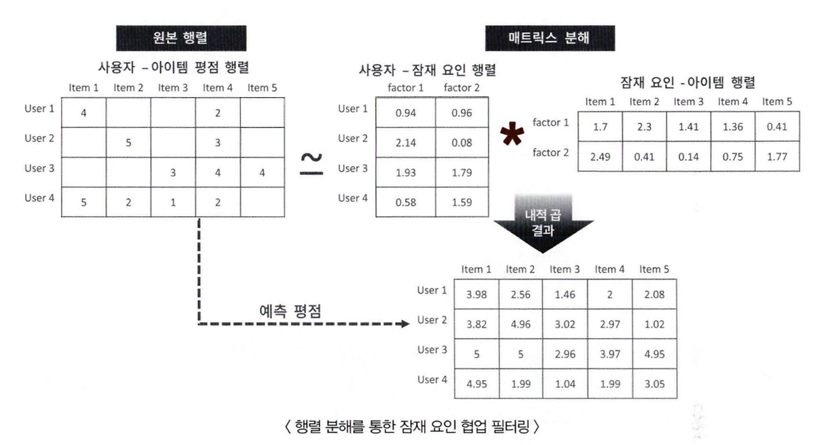

- 다차원 희소 행렬인 사용자一아이템 행렬 데이터를 저차원 밀집 행렬의 사용자-잠재 요인 행렬과 아이템-잠재 요인 행렬의 전치 행렬（즉, 잠재 요인-아이템 행렬）로 분해함 -> 두 행렬의 내적을 통해 새로운 예측 사용자—아이템 평점 행렬 데이터를 만듦


< 행렬 분해의 이해 >

- 다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법

- 사용자-아이템 행렬(MxN) -> 사용자-잠재요인 행렬(MxK) * 잠재요인-아이템 행렬(KxN)

  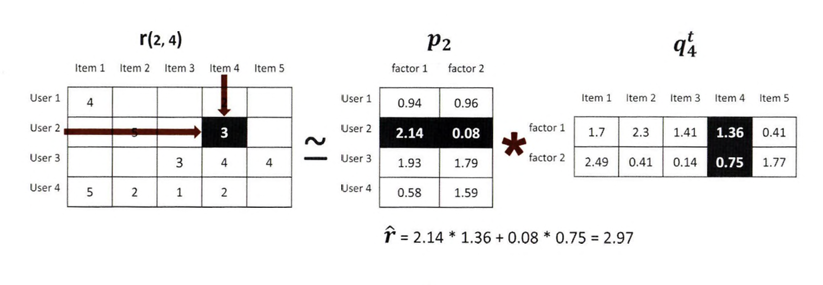

- 행렬 분해는 주로 SVD(Singular Value Decomposition) 방식을 이용함

- 그러나, SVD는 널(NaN) 값이 없는 행렬에만 적용할 수 있음 -> 확률적 경사 하강법이나 ALS(Alternating Least Squares) 방식을 이용해 SVD를 수행


< 확률적 경사 하강법을 이용한 행렬 분해 >

-  P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것

1. P와 Q를 임의의 값을 가진 행렬로 설정

2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산

3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트

4. 만족할 만한 오류 값을 가질 때까지 작업을 반복하면서 P와 Q 값을 업데이트해 근사화

   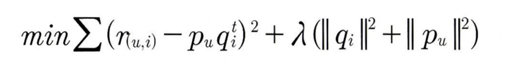

- 예측 오류값의 최소화와 학습 시 과적합을 피하기 위해서 규제를 반영한 비용 함수를 적용



In [4]:
# SGD를 이용한 행렬 분해
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정.
R = np.array([[4, np.nan, np.nan, 2, np.nan],
              [np.nan, 5, np.nan, 3, 1],
              [np.nan, np.nan, 3, 4, 4],
              [5, 2, 1, 2, np.nan]])

num_users, num_items = R.shape
K=3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력합니다.
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [5]:
from sklearn.metrics import mean_squared_error

def get_rmse(R,P,Q,non_zeros):
  error = 0
  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P,Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros,full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

In [6]:
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장.
non_zeros = [(i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0]

steps = 1000
learning_rate = 0.01
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
  for i,j,r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 구함
    eij = r - np.dot(P[i,:],Q[j,:].T)
    # Regularization을 반영한 SGD 업데이트 공식 적용
    P[i,:] = P[i,:] + learning_rate*(eij * Q[j,:] - r_lambda*P[i,:])
    Q[j,:] = Q[j,:] + learning_rate*(eij * P[i,:] - r_lambda*Q[j,:])

    rmse = get_rmse(R,P,Q,non_zeros)
    if (step % 50) == 0:
      print("### iteration step : ", step, " rmse : ", rmse)

### iteration step :  0  rmse :  3.261355059488935
### iteration step :  0  rmse :  3.26040057174686
### iteration step :  0  rmse :  3.253984404542389
### iteration step :  0  rmse :  3.2521583839863624
### iteration step :  0  rmse :  3.252335303789125
### iteration step :  0  rmse :  3.251072196430487
### iteration step :  0  rmse :  3.2492449982564864
### iteration step :  0  rmse :  3.247416477570409
### iteration step :  0  rmse :  3.241926055455223
### iteration step :  0  rmse :  3.2400454107613084
### iteration step :  0  rmse :  3.240166740749792
### iteration step :  0  rmse :  3.2388050277987723
### iteration step :  50  rmse :  0.5003190892212748
### iteration step :  50  rmse :  0.5001616291326989
### iteration step :  50  rmse :  0.49899601202578087
### iteration step :  50  rmse :  0.4988483450145831
### iteration step :  50  rmse :  0.49895189256631756
### iteration step :  50  rmse :  0.49833236830090993
### iteration step :  50  rmse :  0.4984148489378701
### iterati

In [7]:
pred_matrix = np.dot(P,Q.T)
print('예측 행렬:\n',np.round(pred_matrix,3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
